In [2]:
import os
os.environ['PATH'] += os.pathsep + '/Users/hongtaeyang/.local/bin/kaggle'  # Kaggle CLI 경로를 여기에 입력

In [3]:
import sys
!{sys.executable} -m pip install pandas

In [4]:
import sys
!{sys.executable} -m ensurepip --upgrade

Looking in links: /var/folders/c1/ff1kv08j2fd06b_058sckl9w0000gn/T/tmpxy7oy5zl


In [5]:
!{sys.executable} -m pip install --upgrade pip

In [6]:
!{sys.executable} -m pip install matplotlib opencv-python pydicom

In [7]:
!pip install tensorflow --no-cache-dir

In [8]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/homebrew/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [12]:
import PIL
print(PIL.__version__)

11.1.0


In [13]:
!kaggle competitions list

ref                                                                              deadline             category                reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-2    2025-04-01 23:59:00  Featured         2,117,152 Usd       1222           False  
https://www.kaggle.com/competitions/konwinski-prize                              2025-03-12 23:59:00  Featured         1,225,000 Usd        217           False  
https://www.kaggle.com/competitions/czii-cryo-et-object-identification           2025-02-05 23:59:00  Featured            75,000 Usd        904           False  
https://www.kaggle.com/competitions/equity-post-HCT-survival-predictions         2025-03-05 23:59:41  Research            50,000 Usd       2074           False  
https://www.kaggle.com/compe

In [14]:
!kaggle competitions download -c rsna-pneumonia-detection-challenge -p Pneumonia_Project/data

rsna-pneumonia-detection-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
import zipfile

# ZIP 파일 경로 설정
zip_file_path = "Pneumonia_Project/data/rsna-pneumonia-detection-challenge.zip"

# 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("Pneumonia_Project/data")

print("데이터 압축 해제가 완료되었습니다!")

데이터 압축 해제가 완료되었습니다!


In [16]:
# 압축 해제된 데이터 확인
print(os.listdir("Pneumonia_Project/data"))

['stage_2_test_images', 'stage_2_detailed_class_info.csv', 'stage_2_sample_submission.csv', 'stage_2_train_images', 'rsna-pneumonia-detection-challenge.zip', 'GCP Credits Request Link - RSNA.txt', 'stage_2_train_labels.csv', '.ipynb_checkpoints']


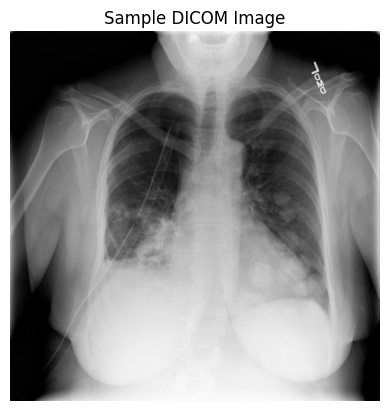

In [17]:
import os
import pydicom
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드 및 탐색
# CSV 파일 로드
labels_path = "./Pneumonia_Project/data/stage_2_train_labels.csv"
labels = pd.read_csv(labels_path)

# 2. DICOM 파일 시각화
# DICOM 파일 경로 확인
dicom_path = "./Pneumonia_Project/data/stage_2_train_images/"

# DICOM 파일 읽기 및 샘플 시각화
sample_id = labels.iloc[0]["patientId"]
sample_path = os.path.join(dicom_path, sample_id + ".dcm")
dicom_data = pydicom.dcmread(sample_path)
image = dicom_data.pixel_array

# DICOM 이미지 시각화
plt.imshow(image, cmap='gray')
plt.title("Sample DICOM Image")
plt.axis("off")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

# 3. 데이터 분할
# 학습/검증/테스트 데이터 분리
train_val_labels, test_labels = train_test_split(
    labels, test_size=0.2, random_state=42, stratify=labels["Target"]
)

train_labels, val_labels = train_test_split(
    train_val_labels, test_size=0.2, random_state=42, stratify=train_val_labels["Target"]
)

# Target 값을 문자열로 변환
train_labels["Target"] = train_labels["Target"].astype(str)
val_labels["Target"] = val_labels["Target"].astype(str)
test_labels["Target"] = test_labels["Target"].astype(str)

# patientId에 파일 확장자 추가
train_labels["patientId"] = train_labels["patientId"] + ".png"
val_labels["patientId"] = val_labels["patientId"] + ".png"
test_labels["patientId"] = test_labels["patientId"] + ".png"

print(f"Train 데이터: {len(train_labels)}")
print(f"Validation 데이터: {len(val_labels)}")
print(f"Test 데이터: {len(test_labels)}")

Train 데이터: 19344
Validation 데이터: 4837
Test 데이터: 6046


In [18]:
import cv2
import numpy as np


# 4. DICOM → PNG 변환
# DICOM 이미지를 PNG로 변환하여 저장
output_dir = "./Pneumonia_Project/processed_images/"
os.makedirs(output_dir, exist_ok=True)

def convert_dicom_to_png(row):
    patient_id = row["patientId"]
    label = row["Target"]
    dicom_file = os.path.join(dicom_path, patient_id + ".dcm")
    output_file = os.path.join(output_dir, patient_id + ".png")
    
    try:
        dicom_data = pydicom.dcmread(dicom_file)
        image = dicom_data.pixel_array
        image = cv2.resize(image, (224, 224))  # 이미지 크기 조정
        cv2.imwrite(output_file, image)
    except Exception as e:
        print(f"Error processing {dicom_file}: {e}")

# 모든 DICOM 데이터를 변환
labels.apply(convert_dicom_to_png, axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
30222    None
30223    None
30224    None
30225    None
30226    None
Length: 30227, dtype: object

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 5. 데이터 증강 및 전처리
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# 데이터 증강 및 정규화
data_gen = ImageDataGenerator(
    rescale=1./255,             # 정규화
    rotation_range=15,          # 회전
    width_shift_range=0.1,      # 가로 이동
    height_shift_range=0.1,     # 세로 이동
    horizontal_flip=True        # 좌우 반전
)

# 학습 데이터 생성기
train_gen = data_gen.flow_from_dataframe(
    dataframe=train_labels,
    directory=output_dir,
    x_col="patientId",
    y_col="Target",
    target_size=IMG_SIZE,
    color_mode="grayscale",
    class_mode="binary",
    batch_size=BATCH_SIZE
)

# 검증 데이터 생성기
val_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    dataframe=val_labels,
    directory=output_dir,
    x_col="patientId",
    y_col="Target",
    target_size=IMG_SIZE,
    color_mode="grayscale",
    class_mode="binary",
    batch_size=BATCH_SIZE
)

# 테스트 데이터 생성기
test_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    dataframe=test_labels,
    directory=output_dir,
    x_col="patientId",
    y_col="Target",
    target_size=IMG_SIZE,
    color_mode="grayscale",
    class_mode="binary",
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 19344 validated image filenames belonging to 2 classes.
Found 4837 validated image filenames belonging to 2 classes.
Found 6046 validated image filenames belonging to 2 classes.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 6. CNN 모델 설계
# CNN 모델 정의
model = Sequential([
    Input(shape=(224, 224, 1)),  # Input 객체로 입력 형식 정의
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # 이진 분류를 위한 출력층
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,906,945 (91.20 MB)

 Trainable params: 23,906,945 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# 7. 모델 학습
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen)
)

Epoch 1/10


/opt/homebrew/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


605/605 ━━━━━━━━━━━━━━━━━━━━ 160s 264ms/step - accuracy: 0.6916 - loss: 0.6503 - val_accuracy: 0.7407 - val_loss: 0.5144
Epoch 2/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 171s 283ms/step - accuracy: 0.7297 - loss: 0.5374 - val_accuracy: 0.7548 - val_loss: 0.4969
Epoch 3/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 161s 267ms/step - accuracy: 0.7389 - loss: 0.5239 - val_accuracy: 0.7647 - val_loss: 0.4844
Epoch 4/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 162s 267ms/step - accuracy: 0.7487 - loss: 0.5173 - val_accuracy: 0.7639 - val_loss: 0.4762
Epoch 5/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 162s 268ms/step - accuracy: 0.7480 - loss: 0.5136 - val_accuracy: 0.7687 - val_loss: 0.4748
Epoch 6/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 321s 531ms/step - accuracy: 0.7607 - loss: 0.4967 - val_accuracy: 0.7701 - val_loss: 0.4801
Epoch 7/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 158s 261ms/step - accuracy: 0.7550 - loss: 0.5050 - val_accuracy: 0.7778 - val_loss: 0.4699
Epoch 8/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 160s 265ms/step - accuracy: 0.7565 - loss: 0.50

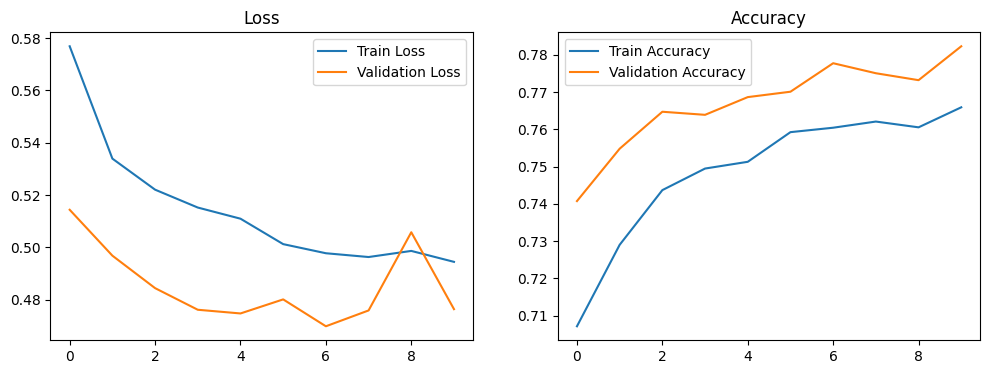

In [24]:
# 8. 학습 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [25]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

189/189 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7873 - loss: 0.4734
Test Accuracy: 78.96%
